## Product Class

In [1]:
class Product():

    def __init__(self, name, space, value):
        self.name = name
        self.space = space
        self.value = value

In [2]:
p1 = Product('Moto', 0.0009, 2199.12)
p1.name, p1.space, p1.value

('Moto', 0.0009, 2199.12)

In [3]:
prod_list = []
prod_list.append(Product("Geladeira Dako", 0.751, 999.90))
prod_list.append(Product("Iphone 6", 0.0000899, 2911.12))
prod_list.append(Product("TV 55' ", 0.400, 4346.99))
prod_list.append(Product("TV 50' ", 0.290, 3999.90))
prod_list.append(Product("TV 42' ", 0.200, 2999.00))
prod_list.append(Product("Notebook Dell", 0.00350, 2499.90))
prod_list.append(Product("Ventilador Panasonic", 0.496, 199.90))
prod_list.append(Product("Microondas Electrolux", 0.0424, 308.66))
prod_list.append(Product("Microondas LG", 0.0544, 429.90))
prod_list.append(Product("Microondas Panasonic", 0.0319, 299.29))
prod_list.append(Product("Geladeira Brastemp", 0.635, 849.00))
prod_list.append(Product("Geladeira Consul", 0.870, 1199.89))
prod_list.append(Product("Notebook Lenovo", 0.498, 1999.90))
prod_list.append(Product("Notebook Asus", 0.527, 3999.00))
for prod in prod_list:
    print(f"Product name: {prod.name} | Value: R$ {prod.value}")

Product name: Geladeira Dako | Value: R$ 999.9
Product name: Iphone 6 | Value: R$ 2911.12
Product name: TV 55'  | Value: R$ 4346.99
Product name: TV 50'  | Value: R$ 3999.9
Product name: TV 42'  | Value: R$ 2999.0
Product name: Notebook Dell | Value: R$ 2499.9
Product name: Ventilador Panasonic | Value: R$ 199.9
Product name: Microondas Electrolux | Value: R$ 308.66
Product name: Microondas LG | Value: R$ 429.9
Product name: Microondas Panasonic | Value: R$ 299.29
Product name: Geladeira Brastemp | Value: R$ 849.0
Product name: Geladeira Consul | Value: R$ 1199.89
Product name: Notebook Lenovo | Value: R$ 1999.9
Product name: Notebook Asus | Value: R$ 3999.0


## Person Class

In [4]:
from random import random

In [5]:
class Person():

    def __init__(self, space, value, space_limit, generation=0):
        self.space = space
        self.value = value
        self.space_limit = space_limit
        self.note_val = 0
        self.used_space = 0
        self.generation = generation
        self.chromosome = []

        for i in range(len(space)):
            if random() < 0.5:
                self.chromosome.append("0")
            else:
                self.chromosome.append("1")

    def validation(self):
        note = 0
        sum_space = 0
        for i in range(len(self.chromosome)):
            if self.chromosome[i] == '1':
                note += self.value[i]
                sum_space += self.space[i]

        if sum_space > self.space_limit:
            note = 1
        self.note_val = note
        self.used_space = round(sum_space, 5)

    def crossover(self, other):
        cut = round(random() * len(self.chromosome))
        son1 = other.chromosome[0:cut] + other.chromosome[cut::]
        son2 = self.chromosome[0:cut] + other.chromosome[cut::]

        sons = [Person(self.space, self.value, self.space_limit, self.generation + 1),
                Person(self.space, self.value, self.space_limit, self.generation + 1)]

        sons[0].chromosome = son1
        sons[1].chromosome = son2

        return sons

    def mutation(self, mutation_rate):
        print(f"\nBefore: {self.chromosome}")
        for i in range(len(self.chromosome)):
            if random() < mutation_rate == '1':
                self.chromosome[i] == '0'
            else:
                self.chromosome[i] = '1'

        print(f"After: {self.chromosome}")
        return self

## Class Genetic

In [6]:
class Genetic():
    
    def __init__(self, population_size):
        self.population_size = population_size
        self.population = []
        self.generation = 0
        self.best_solution = 0
        self.solution_list = []

    def population_initialize(self, space, value, space_limit):
        for i in range(self.population_size):
            self.population.append(Person(space, value, space_limit))
        self.best_solution = self.population[0]

    def sort_population(self):
        self.population = sorted(self.population,\
            key = lambda population: population.note_val, reverse=True)

    def best_person(self, person):
        if person.note_val > self.best_solution.note_val:
            self.best_solution = person

    def sum_val(self):
        sum_ = 0
        for person in self.population:
            sum_ += person.note_val

        return sum_

    def select_father(self, sum_val):
        father, sum_, i = -1, 0, 0
        sorted_val = random() * sum_val
        while i < len(self.population) and sum_ < sorted_val:
            sum_ += self.population[i].note_val
            father += 1
            i += 1
        
        return father

    def generation_visualize(self):
        best = self.population[0]
        print(f"\nGeneration: {self.population[0].generation} \nValue: {best.note_val}\
            \nSpace: {best.used_space} \nChromosome: {best.chromosome}")

    def resolve(self, mutation_rate, gen_num, spaces, value, space_limit):
        self.population_initialize(spaces, value, space_limit)

        for person in self.population:
            person.validation()

        self.sort_population()
        self.best_solution = self.population[0]
        self.solution_list.append(self.best_solution.note_val)
        self.generation_visualize()

        for generation in range(gen_num):
            sum_value = self.sum_val()
            new_population = []

            for person_gen in range(0, self.population_size, 2):
                f1 = self.select_father(sum_value)
                f2 = self.select_father(sum_value)

                sons = self.population[f1].crossover(self.population[f2])
                new_population.append(sons[0].mutation(mutation_rate))
                new_population.append(sons[1].mutation(mutation_rate))

            self.population = list(new_population)

            for person in self.population:
                person.validation()

            
            self.sort_population()
            self.generation_visualize()

            best = self.population[0]
            self.solution_list.append(best.note_val)
            self.best_person(best)

        print(f"\nBest Solution G: {self.best_solution.generation} \nValue: {self.best_solution.note_val}\
            \nSpace: {self.best_solution.used_space} \nChromosome: {self.best_solution.chromosome}")

        return self.best_solution.chromosome

In [7]:
space, value, name = [], [], []

for prod in prod_list:
    space.append(prod.space)
    value.append(prod.value)
    name.append(prod.name)

In [8]:
LIMIT = 3

person1 = Person(space, value, LIMIT)
print(f"Space: {person1.space}\nValue: {person1.value}\nChromossome: {person1.chromosome}")

Space: [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
Value: [999.9, 2911.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
Chromossome: ['0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0']


In [9]:
for i in range(len(prod_list)):
    if person1.chromosome[i] == '1':
        print(f"Name: {prod_list[i].name} \nValue: R$ {prod_list[i].value}")

Name: TV 55'  
Value: R$ 4346.99
Name: TV 50'  
Value: R$ 3999.9
Name: Microondas LG 
Value: R$ 429.9
Name: Microondas Panasonic 
Value: R$ 299.29


In [10]:
person1.validation()
print(f"Note: {person1.note_val} \nUsed Space: {person1.used_space}")

Note: 9076.08 
Used Space: 0.7763


## Crossover

In [11]:
person2 = Person(space, value, LIMIT)
print(f"Space: {person2.space}\nValue: {person2.value}\nChromossome: {person2.chromosome}\n")

for i in range(len(prod_list)):
    if person1.chromosome[i] == '1':
        print(f"Name: {prod_list[i].name} \nValue: R$ {prod_list[i].value}")

person2.validation()
print(f"\nNote: {person2.note_val} \nUsed Space: {person2.used_space}")

Space: [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]
Value: [999.9, 2911.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]
Chromossome: ['1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0']

Name: TV 55'  
Value: R$ 4346.99
Name: TV 50'  
Value: R$ 3999.9
Name: Microondas LG 
Value: R$ 429.9
Name: Microondas Panasonic 
Value: R$ 299.29

Note: 12324.589999999998 
Used Space: 2.5399


In [12]:
person1.crossover(person2)

[<__main__.Person at 0x7f5c620f5d90>, <__main__.Person at 0x7f5c620f5430>]

In [13]:
person1.mutation(0.005)


Before: ['0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


In [14]:
person2.mutation(0.05)


Before: ['1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


In [15]:
pop_size = 20
ag = Genetic(pop_size)
ag.population_initialize(space, value, LIMIT)

for person in ag.population:
    person.validation()

ag.sort_population()
ag.best_person(ag.population[0])

In [16]:
for i in range(ag.population_size):
    print(f"Person: {i+1} \nSpace: {str(ag.population[i].space)}\
            \nValue: {str(ag.population[i].value)}\
                \nChromosome: {str(ag.population[i].chromosome)}\
                    \nNote: {ag.population[i].note_val}\n")

Person: 1 
Space: [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]            
Value: [999.9, 2911.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]                
Chromosome: ['0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0']                    
Note: 21114.36

Person: 2 
Space: [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]            
Value: [999.9, 2911.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]                
Chromosome: ['0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0']                    
Note: 16885.89

Person: 3 
Space: [0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]            
Value: [999.9, 2911.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89,

In [17]:
print(f"Best Soluiton: {ag.best_solution.chromosome} \nNote: {ag.best_solution.note_val}")

Best Soluiton: ['0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0'] 
Note: 21114.36


In [18]:
sum_ = ag.sum_val()
print(f"The sum of validation is: {round(sum_,4)}")

The sum of validation is: 136530.03


In [19]:
for person_generate in range(0, ag.population_size, 2):
    father1 = ag.select_father(sum_)
    father2 = ag.select_father(sum_)
father1, father2

(4, 0)

In [20]:
new_population = []
prob_mutation = 0.01

for person_generate in range(0, ag.population_size, 2):
    father1 = ag.select_father(sum_)
    father2 = ag.select_father(sum_)
    sons = ag.population[father1].crossover(ag.population[father2])
    new_population.append(sons[0].mutation(prob_mutation))
    new_population.append(sons[1].mutation(prob_mutation))

ag.population = list(new_population)

for person in ag.population:
    person.validation()

ag.sort_population()
ag.best_person(ag.population[0])
sum_ = ag.sum_val()

print(f"\n\nBest: {ag.best_solution.chromosome} \nValue: {ag.best_solution.note_val}\n")


Before: ['0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['0', '1', '1', '1', '0', '1', '1', '0', '1

In [21]:
limit = 8
pop_size = 10
mutation_rate = 0.01
gen_num = 100
ag = Genetic(pop_size)
result = ag.resolve(mutation_rate, gen_num, space, value, limit)

for i in range(len(prod_list)):
    if result[i] == '1':
        print(f"Name: {prod_list[i].name} \nR$ {prod_list[i].value}")


Generation: 0 
Value: 18334.2            
Space: 1.85189 
Chromosome: ['0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1']

Before: ['0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0']
After: ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

Before: ['0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0'

In [22]:
person.note_val

1

In [23]:
import matplotlib.pyplot as plt

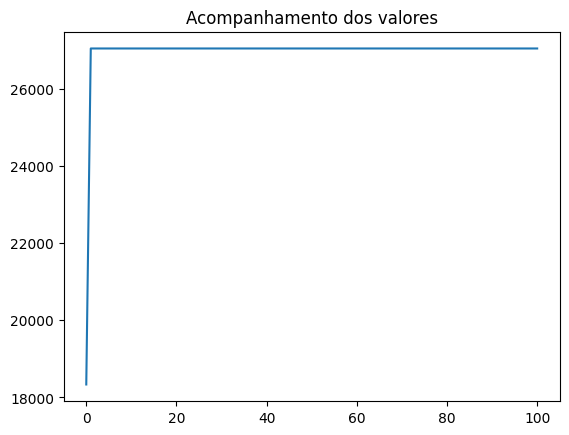

In [24]:
plt.plot(ag.solution_list)
plt.title("Acompanhamento dos valores")
plt.show()

## DEAP - Library

In [25]:
# pip install deap

Note: you may need to restart the kernel to use updated packages.


In [27]:
import random
import numpy as np
import matplotlib.pyplot as plt

from deap import base, creator, algorithms, tools

In [30]:
prod_list = []
prod_list.append(Product("Geladeira Dako", 0.751, 999.90))
prod_list.append(Product("Iphone 6", 0.0000899, 2911.12))
prod_list.append(Product("TV 55' ", 0.400, 4346.99))
prod_list.append(Product("TV 50' ", 0.290, 3999.90))
prod_list.append(Product("TV 42' ", 0.200, 2999.00))
prod_list.append(Product("Notebook Dell", 0.00350, 2499.90))
prod_list.append(Product("Ventilador Panasonic", 0.496, 199.90))
prod_list.append(Product("Microondas Electrolux", 0.0424, 308.66))
prod_list.append(Product("Microondas LG", 0.0544, 429.90))
prod_list.append(Product("Microondas Panasonic", 0.0319, 299.29))
prod_list.append(Product("Geladeira Brastemp", 0.635, 849.00))
prod_list.append(Product("Geladeira Consul", 0.870, 1199.89))
prod_list.append(Product("Notebook Lenovo", 0.498, 1999.90))
prod_list.append(Product("Notebook Asus", 0.527, 3999.00))
for prod in prod_list:
    print(f"Product name: {prod.name} | Value: R$ {prod.value}")

Product name: Geladeira Dako | Value: R$ 999.9
Product name: Iphone 6 | Value: R$ 2911.12
Product name: TV 55'  | Value: R$ 4346.99
Product name: TV 50'  | Value: R$ 3999.9
Product name: TV 42'  | Value: R$ 2999.0
Product name: Notebook Dell | Value: R$ 2499.9
Product name: Ventilador Panasonic | Value: R$ 199.9
Product name: Microondas Electrolux | Value: R$ 308.66
Product name: Microondas LG | Value: R$ 429.9
Product name: Microondas Panasonic | Value: R$ 299.29
Product name: Geladeira Brastemp | Value: R$ 849.0
Product name: Geladeira Consul | Value: R$ 1199.89
Product name: Notebook Lenovo | Value: R$ 1999.9
Product name: Notebook Asus | Value: R$ 3999.0


In [33]:
space, value, names = [], [], []

for prod in prod_list:
    space.append(prod.space)
    value.append(prod.value)
    name.append(prod.name)
    print(f"Product name: {prod.name} | Value: R$ {prod.value}")

Product name: Geladeira Dako | Value: R$ 999.9
Product name: Iphone 6 | Value: R$ 2911.12
Product name: TV 55'  | Value: R$ 4346.99
Product name: TV 50'  | Value: R$ 3999.9
Product name: TV 42'  | Value: R$ 2999.0
Product name: Notebook Dell | Value: R$ 2499.9
Product name: Ventilador Panasonic | Value: R$ 199.9
Product name: Microondas Electrolux | Value: R$ 308.66
Product name: Microondas LG | Value: R$ 429.9
Product name: Microondas Panasonic | Value: R$ 299.29
Product name: Geladeira Brastemp | Value: R$ 849.0
Product name: Geladeira Consul | Value: R$ 1199.89
Product name: Notebook Lenovo | Value: R$ 1999.9
Product name: Notebook Asus | Value: R$ 3999.0
